In [1]:
import numpy as np
import pandas as pd
import sys, os, time
main_folder = './../'
if main_folder not in sys.path:
    sys.path.append(main_folder)
from evolution import DifferentialEvolution
from glob       import glob
from tqdm       import tqdm

import dirs
from utils      import get_solution, ProgressBar, write_log
import matplotlib.pyplot as plt 

progbar = ProgressBar(elapsed_time=True)

### Parameters

In [2]:
# Competition Parameters
funcId      = 1
dim         = 10
numRuns     = 2
targetError = 1e-8

# Algorithm Parameters
pop_size = 300
percMaxEvals = 1
maxEvals = 'auto'
maxGenerations = None
fitness_clusters = None
crossover = 'binonial'
mutation = 'best'
n_diff = 1
lambda_mutation = .5
opposition = False
input_data_filepath = './../input_data'
active = False

In [3]:
# Parameters
algorithm = "de"
mutation = "best"
n_diff = 1
crossover = "bin"
funcId = 7
dim = 30
numRuns = 51
pop_size = 300
percMaxEvals = 0.3
lambda_mutation = 0.5
opposition = False
fitness_clusters = None
input_data_filepath = "./input_data"
active = True


In [4]:
maxEvals = maxEvals if percMaxEvals is None else percMaxEvals*10000*dim
run_tag = '[' + '_'.join([str(funcId), 
                          str(dim), 
                          str(numRuns),
                          str(pop_size), 
                          str(percMaxEvals),                                                     
                          '{}'.format(lambda_mutation), 
                          str(opposition),
                          str(fitness_clusters)
                         ])  + ']'
run_tag

'[7_30_51_300_0.3_0.5_False_None]'

In [5]:
alg = DifferentialEvolution(dim=dim, func_id=funcId, pop_size=pop_size, crossover=crossover, 
        opposition=opposition, mutation=mutation, lambda_mutation=.5, fitness_clusters=fitness_clusters)

output_filepath = os.path.join(dirs.results, str(alg))
if not os.path.exists(output_filepath):
    os.makedirs(output_filepath)
output_filepath = output_filepath + '/' + run_tag

print ('Writing log at ', output_filepath + 'log.tsv')
write_log(filepath=output_filepath + 'log.tsv', 
          mode="w+", 
          text='[{}]\trun\telapsedTime\tsuccessRate\n'.format(time.strftime("%Y-%m-%d %H:%M:%S", time.gmtime())))  

Writing log at 

./results/DE/best/1/bin/[7_30_51_300_0.3_0.5_False_None]log.tsv

In [6]:
hist = pd.DataFrame()
arr_runs = range(numRuns)
solution = get_solution(funcId, dim, input_data_filepath=input_data_filepath)
successRate = 0
for idx_run in arr_runs:
    progbar.update_progress(idx_run/float(len(arr_runs)))
    
    # Differential Evolution
    alg = DifferentialEvolution(dim=dim, func_id=funcId, pop_size=pop_size, crossover=crossover, 
        opposition=opposition, mutation=mutation, lambda_mutation=.5, fitness_clusters=fitness_clusters)
    
    errorHist, fitnessHist = alg.optimize(target=solution, max_f_evals=maxEvals, target_error=targetError, verbose=True)        
    bestError = errorHist.iloc[-1,:].min()
    errorHist["run"] = np.ones(errorHist.shape[0], dtype=int)*idx_run
    hist = pd.concat([hist, errorHist], ignore_index=False)    
    if bestError <= targetError:
        print ("Target error achieved with error {}".format(bestError))
        successRate += 1
    
    write_log(filepath=output_filepath + 'log.tsv', 
              text='[{}]\t{}/{}\t{}\t{}\n'.format(time.strftime("%Y-%m-%d %H:%M:%S", time.gmtime()), 
                                              idx_run+1,
                                              len(arr_runs),
                                              progbar.get_elapsed_time(),
                                              successRate)
             )
    
hist.index.name = 'generation'
hist.to_csv(output_filepath + 'hist.tsv', sep='\t')
progbar.update_progress(1)

[0:00:00][----------] 0.00% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	703.4714

Best Fitness:	702.0974
Solution:	700.0000
Diff:		2.0974

[0:13:06][----------] 1.96% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	706.6005

Best Fitness:	703.6285
Solution:	700.0000
Diff:		3.6285

[0:23:59][----------] 3.92% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	704.6689

Best Fitness:	702.9167
Solution:	700.0000
Diff:		2.9167

[0:34:41][#---------] 5.88% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	706.2620

Best Fitness:	703.8850
Solution:	700.0000
Diff:		3.8850

[0:45:10][#---------] 7.84% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	703.8816

Best Fitness:	702.4245
Solution:	700.0000
Diff:		2.4245

[0:55:50][#---------] 9.80% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	703.8040

Best Fitness:	702.5438
Solution:	700.0000
Diff:		2.5438

[1:06:15][#---------] 11.76% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	704.7896

Best Fitness:	702.9480
Solution:	700.0000
Diff:		2.9480

[1:16:47][#---------] 13.73% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	705.6308

Best Fitness:	703.5200
Solution:	700.0000
Diff:		3.5200

[1:27:03][##--------] 15.69% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	706.9206

Best Fitness:	704.1812
Solution:	700.0000
Diff:		4.1812

[1:37:21][##--------] 17.65% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	704.4485

Best Fitness:	702.9787
Solution:	700.0000
Diff:		2.9787

[1:47:51][##--------] 19.61% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	704.3686

Best Fitness:	702.9432
Solution:	700.0000
Diff:		2.9432

[1:58:01][##--------] 21.57% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	703.9636

Best Fitness:	702.6151
Solution:	700.0000
Diff:		2.6151

[2:08:40][##--------] 23.53% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	704.9714

Best Fitness:	702.9157
Solution:	700.0000
Diff:		2.9157

[2:19:26][###-------] 25.49% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	704.5931

Best Fitness:	702.7004
Solution:	700.0000
Diff:		2.7004

[2:29:51][###-------] 27.45% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	705.2177

Best Fitness:	703.2766
Solution:	700.0000
Diff:		3.2766

[2:40:17][###-------] 29.41% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	704.8041

Best Fitness:	703.1310
Solution:	700.0000
Diff:		3.1310

[2:49:28][###-------] 31.37% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	705.6190

Best Fitness:	702.8457
Solution:	700.0000
Diff:		2.8457

[2:58:44][###-------] 33.33% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	704.7244

Best Fitness:	702.5489
Solution:	700.0000
Diff:		2.5489

[3:07:55][####------] 35.29% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	703.7314

Best Fitness:	702.2096
Solution:	700.0000
Diff:		2.2096

[3:17:28][####------] 37.25% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	705.2620

Best Fitness:	703.3151
Solution:	700.0000
Diff:		3.3151

[3:26:32][####------] 39.22% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	703.8257

Best Fitness:	702.4206
Solution:	700.0000
Diff:		2.4206

[3:35:57][####------] 41.18% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	703.7197

Best Fitness:	702.3215
Solution:	700.0000
Diff:		2.3215

[3:45:24][####------] 43.14% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	703.8192

Best Fitness:	702.4106
Solution:	700.0000
Diff:		2.4106

[3:54:51][#####-----] 45.10% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	703.4328

Best Fitness:	702.4279
Solution:	700.0000
Diff:		2.4279

[4:04:02][#####-----] 47.06% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	704.7154

Best Fitness:	702.9242
Solution:	700.0000
Diff:		2.9242

[4:13:28][#####-----] 49.02% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	703.7721

Best Fitness:	702.4567
Solution:	700.0000
Diff:		2.4567

[4:22:38][#####-----] 50.98% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	705.3457

Best Fitness:	703.6115
Solution:	700.0000
Diff:		3.6115

[4:32:03][#####-----] 52.94% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	703.7877

Best Fitness:	702.5508
Solution:	700.0000
Diff:		2.5508

[4:41:25][#####-----] 54.90% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	704.1345

Best Fitness:	702.7368
Solution:	700.0000
Diff:		2.7368

[4:50:53][######----] 56.86% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	705.3751

Best Fitness:	703.1274
Solution:	700.0000
Diff:		3.1274

[5:00:16][######----] 58.82% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	705.2501

Best Fitness:	703.4698
Solution:	700.0000
Diff:		3.4698

[5:09:40][######----] 60.78% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	705.8114

Best Fitness:	703.8125
Solution:	700.0000
Diff:		3.8125

[5:18:48][######----] 62.75% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	703.0719

Best Fitness:	701.7137
Solution:	700.0000
Diff:		1.7137

[5:28:17][######----] 64.71% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	705.8875

Best Fitness:	703.8538
Solution:	700.0000
Diff:		3.8538

[5:37:03][#######---] 66.67% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	702.7758

Best Fitness:	701.7374
Solution:	700.0000
Diff:		1.7374

[5:45:52][#######---] 68.63% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	703.1994

Best Fitness:	702.1200
Solution:	700.0000
Diff:		2.1200

[5:54:06][#######---] 70.59% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	704.5576

Best Fitness:	703.1888
Solution:	700.0000
Diff:		3.1888

[6:02:19][#######---] 72.55% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	705.7063

Best Fitness:	703.2088
Solution:	700.0000
Diff:		3.2088

[6:10:51][#######---] 74.51% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	706.4401

Best Fitness:	704.1540
Solution:	700.0000
Diff:		4.1540

[6:19:14][########--] 76.47% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	703.6457

Best Fitness:	702.2307
Solution:	700.0000
Diff:		2.2307

[6:27:28][########--] 78.43% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	704.4929

Best Fitness:	702.9424
Solution:	700.0000
Diff:		2.9424

[6:35:43][########--] 80.39% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	704.6890

Best Fitness:	702.4566
Solution:	700.0000
Diff:		2.4566

[6:43:49][########--] 82.35% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	704.5924

Best Fitness:	702.5474
Solution:	700.0000
Diff:		2.5474

[6:51:52][########--] 84.31% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	705.4940

Best Fitness:	702.6367
Solution:	700.0000
Diff:		2.6367

[6:59:57][#########-] 86.27% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	706.7657

Best Fitness:	704.0305
Solution:	700.0000
Diff:		4.0305

[7:08:09][#########-] 88.24% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	706.1303

Best Fitness:	703.1933
Solution:	700.0000
Diff:		3.1933

[7:16:25][#########-] 90.20% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	703.8200

Best Fitness:	702.4731
Solution:	700.0000
Diff:		2.4731

[7:24:28][#########-] 92.16% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	705.3214

Best Fitness:	703.4713
Solution:	700.0000
Diff:		3.4713

[7:32:38][#########-] 94.12% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	704.1561

Best Fitness:	702.4828
Solution:	700.0000
Diff:		2.4828

[7:40:53][##########] 96.08% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	703.8830

Best Fitness:	702.2240
Solution:	700.0000
Diff:		2.2240

[7:49:17][##########] 98.04% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	705.2897

Best Fitness:	703.2699
Solution:	700.0000
Diff:		3.2699

[7:57:52][##########] 100.00% Done...


In [7]:
print ("Elapsed Time: ", progbar.get_elapsed_time())

Elapsed Time: 

7:57:52

In [8]:
errorHist.tail()

,0,1,2,3,4,5,6,7,8,9,...,291,292,293,294,295,296,297,298,299,run
generation,,,,,,,,,,,,,,,,,,,,,
293,4.83507,5.902094,6.021663,5.34887,4.455043,6.442485,5.517563,5.822947,4.533326,4.873978,...,6.147236,4.976485,6.170593,4.642628,5.497233,5.657944,6.288911,5.70636,5.147705,50
294,4.83507,5.902094,6.021663,5.34887,4.455043,6.442485,5.517563,5.822947,4.533326,4.873978,...,6.147236,4.976485,6.051521,4.642628,5.497233,5.657944,6.288911,5.70636,5.147705,50
295,4.83507,5.902094,6.021663,5.34887,4.455043,6.442485,5.517563,5.822947,4.533326,4.873978,...,6.147236,4.976485,5.041592,4.642628,5.497233,5.657944,6.288911,5.70636,5.147705,50
296,4.83507,5.902094,6.021663,5.34887,4.455043,4.808732,5.517563,5.822947,4.533326,4.873978,...,6.147236,4.976485,5.041592,4.642628,5.497233,5.346512,6.288911,5.70636,5.147705,50
297,4.83507,5.902094,6.021663,5.34887,4.455043,4.808732,5.517563,5.822947,4.533326,4.873978,...,6.147236,4.976485,5.041592,4.642628,5.497233,5.346512,6.288911,4.22715,5.147705,50


In [9]:
arr_error = list()
arr_best_error = list()
for run in hist['run'].unique():
    df_run = hist[hist['run'] == run].drop(['run'], axis=1) 
    bestError = df_run.iloc[-1,:].min()    
    arr_best_error.append(bestError)    
    print ('Best error for run {}: {}'.format(run, bestError))
    arr_error.append(np.array(df_run.min(axis=1)))    
arr_error = np.array(arr_error)
# arr_error

Best error for run 0: 2.097383627325371

Best error for run 1: 3.628456807647126

Best error for run 2: 2.9167485139167866

Best error for run 3: 3.885010880438017

Best error for run 4: 2.424496009946324

Best error for run 5: 2.543810468088509

Best error for run 6: 2.948019750051799

Best error for run 7: 3.519953577189881

Best error for run 8: 4.181206436052548

Best error for run 9: 2.978737740618385

Best error for run 10: 2.9432400104896033

Best error for run 11: 2.6151226606392584

Best error for run 12: 2.9156614539903103

Best error for run 13: 2.7003690840367653

Best error for run 14: 3.2766375864798647

Best error for run 15: 3.130999527585004

Best error for run 16: 2.8456540699196466

Best error for run 17: 2.548936677508891

Best error for run 18: 2.209575326912841

Best error for run 19: 3.315115211465695

Best error for run 20: 2.420645293823327

Best error for run 21: 2.321510306301434

Best error for run 22: 2.410631143985597

Best error for run 23: 2.4278929251505588

Best error for run 24: 2.924174418195321

Best error for run 25: 2.456732503761259

Best error for run 26: 3.611522006464611

Best error for run 27: 2.550833735796914

Best error for run 28: 2.736823646605785

Best error for run 29: 3.12740359944371

Best error for run 30: 3.4697986126525393

Best error for run 31: 3.8124774997010036

Best error for run 32: 1.713674248754728

Best error for run 33: 3.853790760457855

Best error for run 34: 1.7373505087156218

Best error for run 35: 2.1199627427756695

Best error for run 36: 3.1888102748542906

Best error for run 37: 3.2087560067303684

Best error for run 38: 4.153982717458234

Best error for run 39: 2.230707047825831

Best error for run 40: 2.942430897367899

Best error for run 41: 2.4565941351722813

Best error for run 42: 2.5474479563353043

Best error for run 43: 2.636650294469746

Best error for run 44: 4.030477840548315

Best error for run 45: 3.1932686899446026

Best error for run 46: 2.4731186938081464

Best error for run 47: 3.4712982655765927

Best error for run 48: 2.48281441594213

Best error for run 49: 2.223954291285281

Best error for run 50: 3.2698573579774575

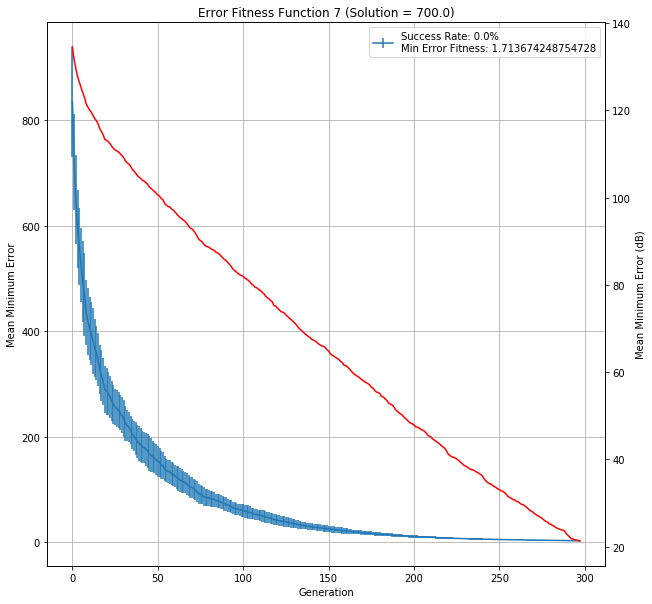

In [10]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,10))
label = 'Success Rate: {}%\nMin Error Fitness: {}'.format(100*(successRate/float(numRuns)), arr_error.min())
ax.errorbar(np.arange(alg.generations), arr_error.mean(axis=0), yerr=arr_error.std(axis=0), label=label)
ax2 = ax.twinx()
ax2.plot(np.arange(alg.generations), 20*np.log(arr_error.mean(axis=0)), label='Mean Min Error (dB)', color='red')
ax2.set_ylabel('Mean Minimum Error (dB)')

ax.grid(True)
ax.set_ylabel('Mean Minimum Error')
ax.legend()
ax.set_xlabel('Generation')
ax.set_title('Error Fitness Function {} (Solution = {})'.format(funcId, solution))
plt.savefig(output_filepath + 'mean_error_evolution.jpeg', bbox_inches = 'tight')

In [11]:
df_sumup = pd.DataFrame(columns=['algorithm', '#Fc', 'D', 'percFES'] + ['run_' + str(i) for i in np.arange(1,numRuns+1,1)] + ['mean', 'elapsed_time', 'evals'])
df_sumup.loc[df_sumup.shape[0]] = [str(alg), funcId, dim, percMaxEvals] + arr_best_error + [np.mean(arr_best_error), progbar.get_elapsed_time(), alg.fitnessEvals]
print ('Saving df_sumup to ', output_filepath + 'df_sumup.tsv')
df_sumup.to_csv(output_filepath + 'df_sumup.tsv', sep='\t')
df_sumup

Saving df_sumup to 

./results/DE/best/1/bin/[7_30_51_300_0.3_0.5_False_None]df_sumup.tsv

,algorithm,#Fc,D,percFES,run_1,run_2,run_3,run_4,run_5,run_6,...,run_45,run_46,run_47,run_48,run_49,run_50,run_51,mean,elapsed_time,evals
0,DE/best/1/bin,7,30,0.3,2.097384,3.628457,2.916749,3.885011,2.424496,2.54381,...,4.030478,3.193269,2.473119,3.471298,2.482814,2.223954,3.269857,2.898638,7:57:52,90000
